In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc
rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False  ## 추가해줍니다. 

In [2]:
edustat = pd.read_excel('edustat_부울경.xlsx', index_col=0)

In [8]:
sum1 = edustat.groupby(['year', '시도', '대계열', '과정구분']).agg(졸업자_남자_비중=('졸업자중남자', 'mean'),
                                  졸업자_여자_비중=('졸업자중여자', 'mean'),
                                  취업자_남자_비중=('취업자중남자', 'mean'),
                                  취업자_여자_비중=('취업자중여자', 'mean'),
                                  전체_취업률=('취업률_계', 'mean'),
                                  남자_취업률=('남자취업률', 'mean'),
                                  여자_취업률=('여자취업률', 'mean'))

In [9]:
sum2 = edustat.groupby(['year', '시도', '대계열', '중계열', '과정구분']).agg(졸업자_남자_비중=('졸업자중남자', 'mean'),
                                  졸업자_여자_비중=('졸업자중여자', 'mean'),
                                  취업자_남자_비중=('취업자중남자', 'mean'),
                                  취업자_여자_비중=('취업자중여자', 'mean'),
                                  전체_취업률=('취업률_계', 'mean'),
                                  남자_취업률=('남자취업률', 'mean'),
                                  여자_취업률=('여자취업률', 'mean'))

In [11]:
sum1.query('대계열 in ["공학계열", "자연계열", "의약계열"]').to_excel("이공계_대계열_요약_20220627.xlsx", merge_cells=False)
sum2.query('대계열 in ["공학계열", "자연계열", "의약계열"]').to_excel("이공계_대계열_중계열_요약_20220627.xlsx", merge_cells=False)

In [13]:
sum11 = sum1.query('대계열 in ["공학계열", "자연계열", "의약계열"]')
sum21 = sum2.query('대계열 in ["공학계열", "자연계열", "의약계열"]')

In [14]:
sum11univ = sum11.query('과정구분 == "대학과정"')
sum21univ = sum21.query('과정구분 == "대학과정"')

In [15]:
sum11univ_sum = sum11univ.reset_index().query('시도 in ["경남", "부산", "울산"] & 대계열 == "공학계열"')

In [16]:
sum111 = sum11univ_sum.melt(id_vars = ['year', '시도', '대계열', '과정구분'])

In [17]:
sum111

,year,시도,대계열,과정구분,variable,value
0,2011,경남,공학계열,대학과정,졸업자_남자_비중,0.809518
1,2011,부산,공학계열,대학과정,졸업자_남자_비중,0.765930
2,2011,울산,공학계열,대학과정,졸업자_남자_비중,0.797958
3,2012,경남,공학계열,대학과정,졸업자_남자_비중,0.840132
4,2012,부산,공학계열,대학과정,졸업자_남자_비중,0.774095
...,...,...,...,...,...,...
205,2019,부산,공학계열,대학과정,여자_취업률,0.565451
206,2019,울산,공학계열,대학과정,여자_취업률,0.426609
207,2020,경남,공학계열,대학과정,여자_취업률,0.494898
208,2020,부산,공학계열,대학과정,여자_취업률,0.504623


### 부울경 공학계열 추세

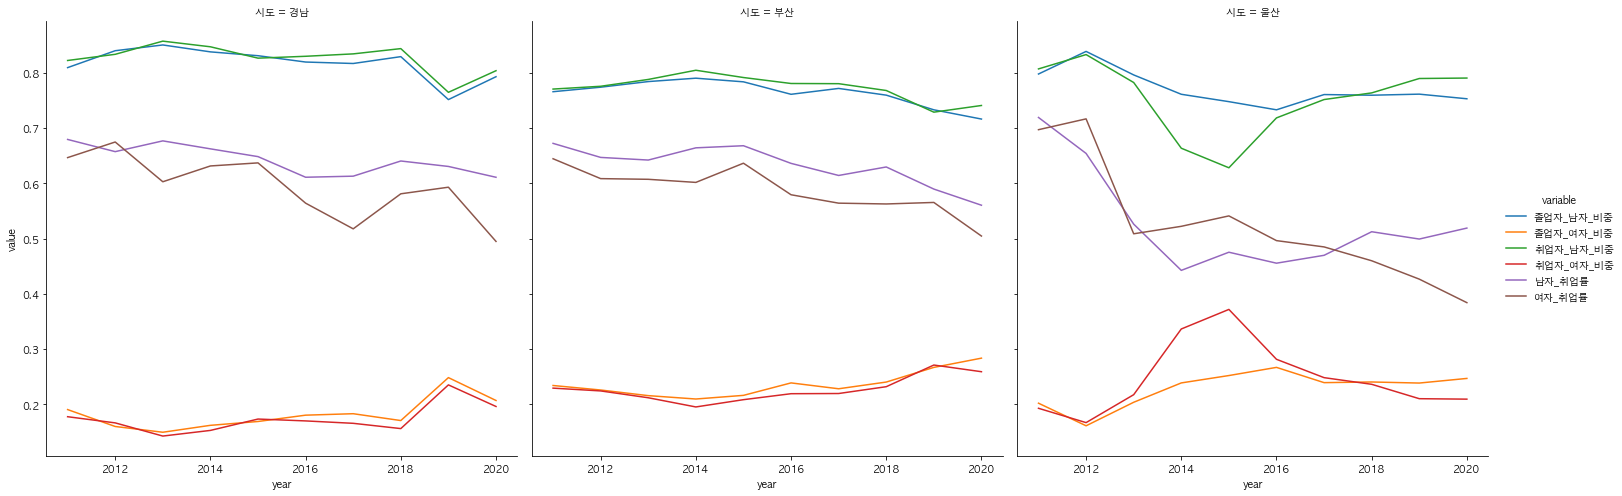

In [20]:
g = sns.relplot(data = sum111.query('variable != "전체_취업률"'), x = 'year', y = 'value', hue = 'variable', kind='line', height = 7,
col = '시도', col_wrap=3)

### 부울경 공학계열 전공별 추세 (학부)

In [48]:
sum22 = sum21.query('대계열 == "공학계열"').reset_index()

In [49]:
sum222 = sum22.melt(id_vars = ['year', '시도', '대계열', '중계열', '과정구분'])

In [50]:
sum222

,year,시도,대계열,중계열,과정구분,variable,value
0,2011,경남,공학계열,건축,대학과정,졸업자_남자_비중,0.585807
1,2011,경남,공학계열,건축,대학원과정,졸업자_남자_비중,0.854167
2,2011,경남,공학계열,건축,전문대학과정,졸업자_남자_비중,0.849121
3,2011,경남,공학계열,교통ㆍ운송,대학과정,졸업자_남자_비중,0.878507
4,2011,경남,공학계열,교통ㆍ운송,대학원과정,졸업자_남자_비중,0.973684
...,...,...,...,...,...,...,...
8472,2020,울산,공학계열,토목ㆍ도시,대학과정,여자_취업률,0.366667
8473,2020,울산,공학계열,토목ㆍ도시,대학원과정,여자_취업률,0.650000
8474,2020,울산,공학계열,화공,대학과정,여자_취업률,0.533333
8475,2020,울산,공학계열,화공,대학원과정,여자_취업률,0.714286


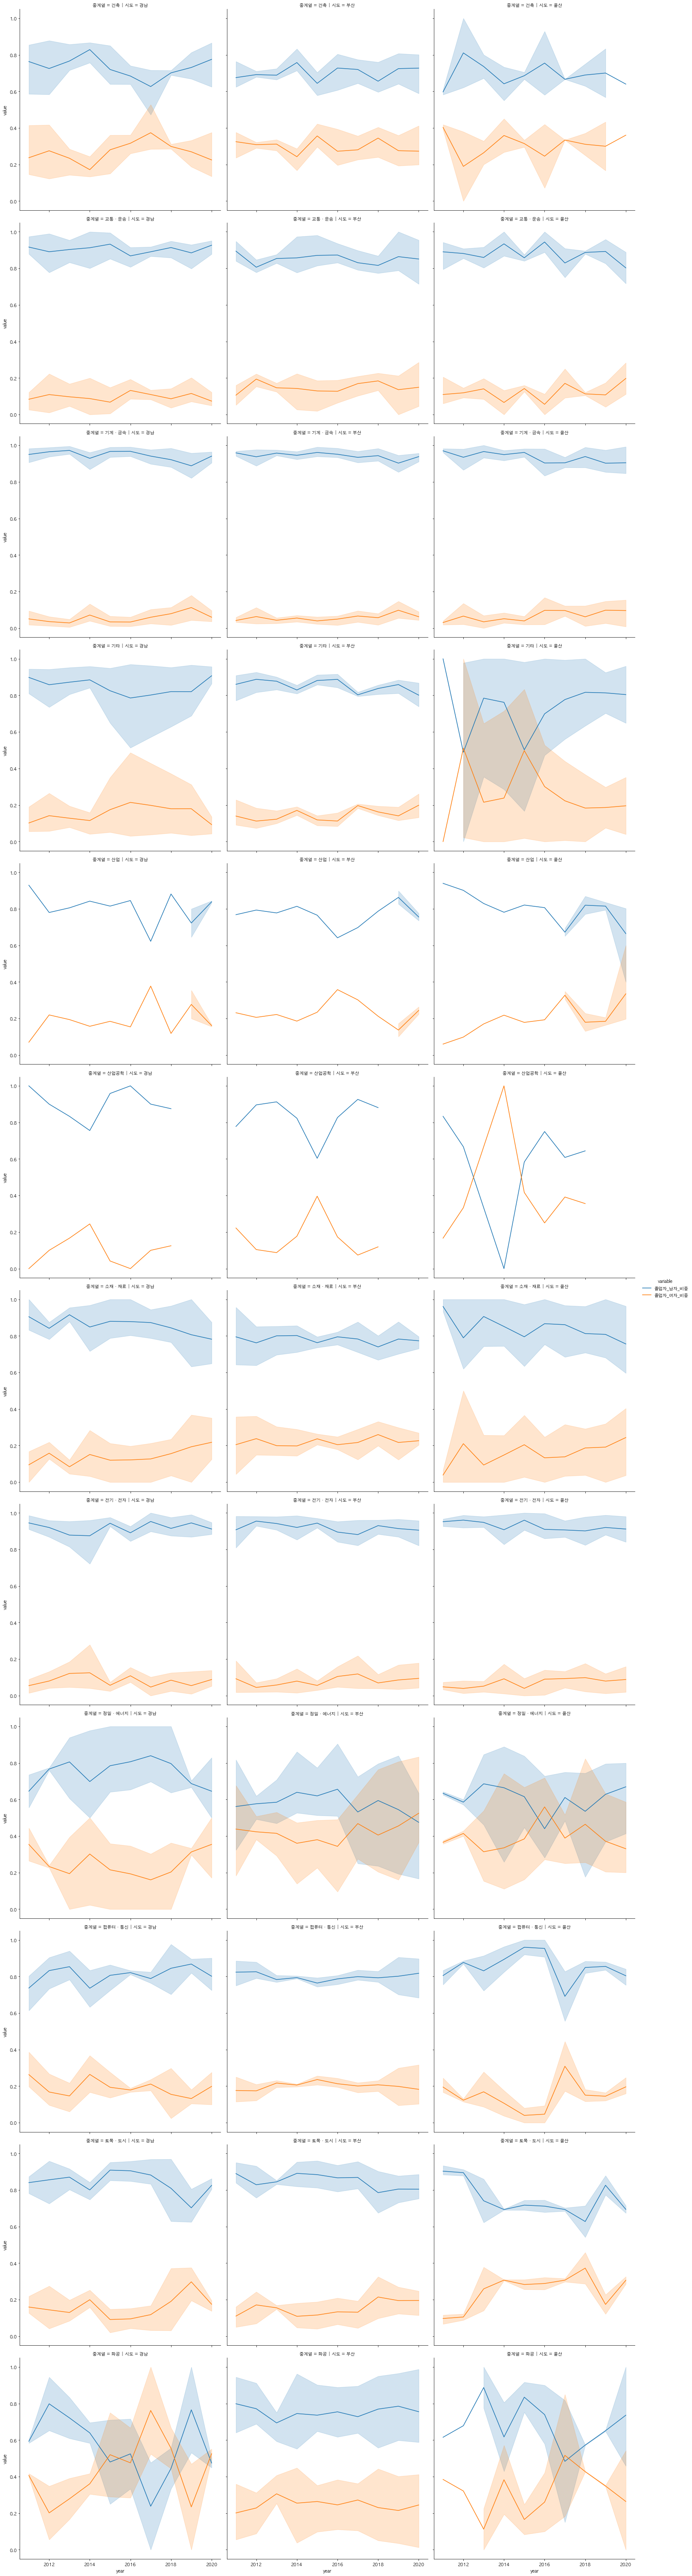

In [52]:
sns.relplot(data = sum222.query('variable in ["졸업자_남자_비중", "졸업자_여자_비중"] & 시도 in ["경남", "부산", "울산"]'), x = 'year', y = 'value', hue = 'variable', kind='line', height = 7,
col = '시도', row = '중계열')

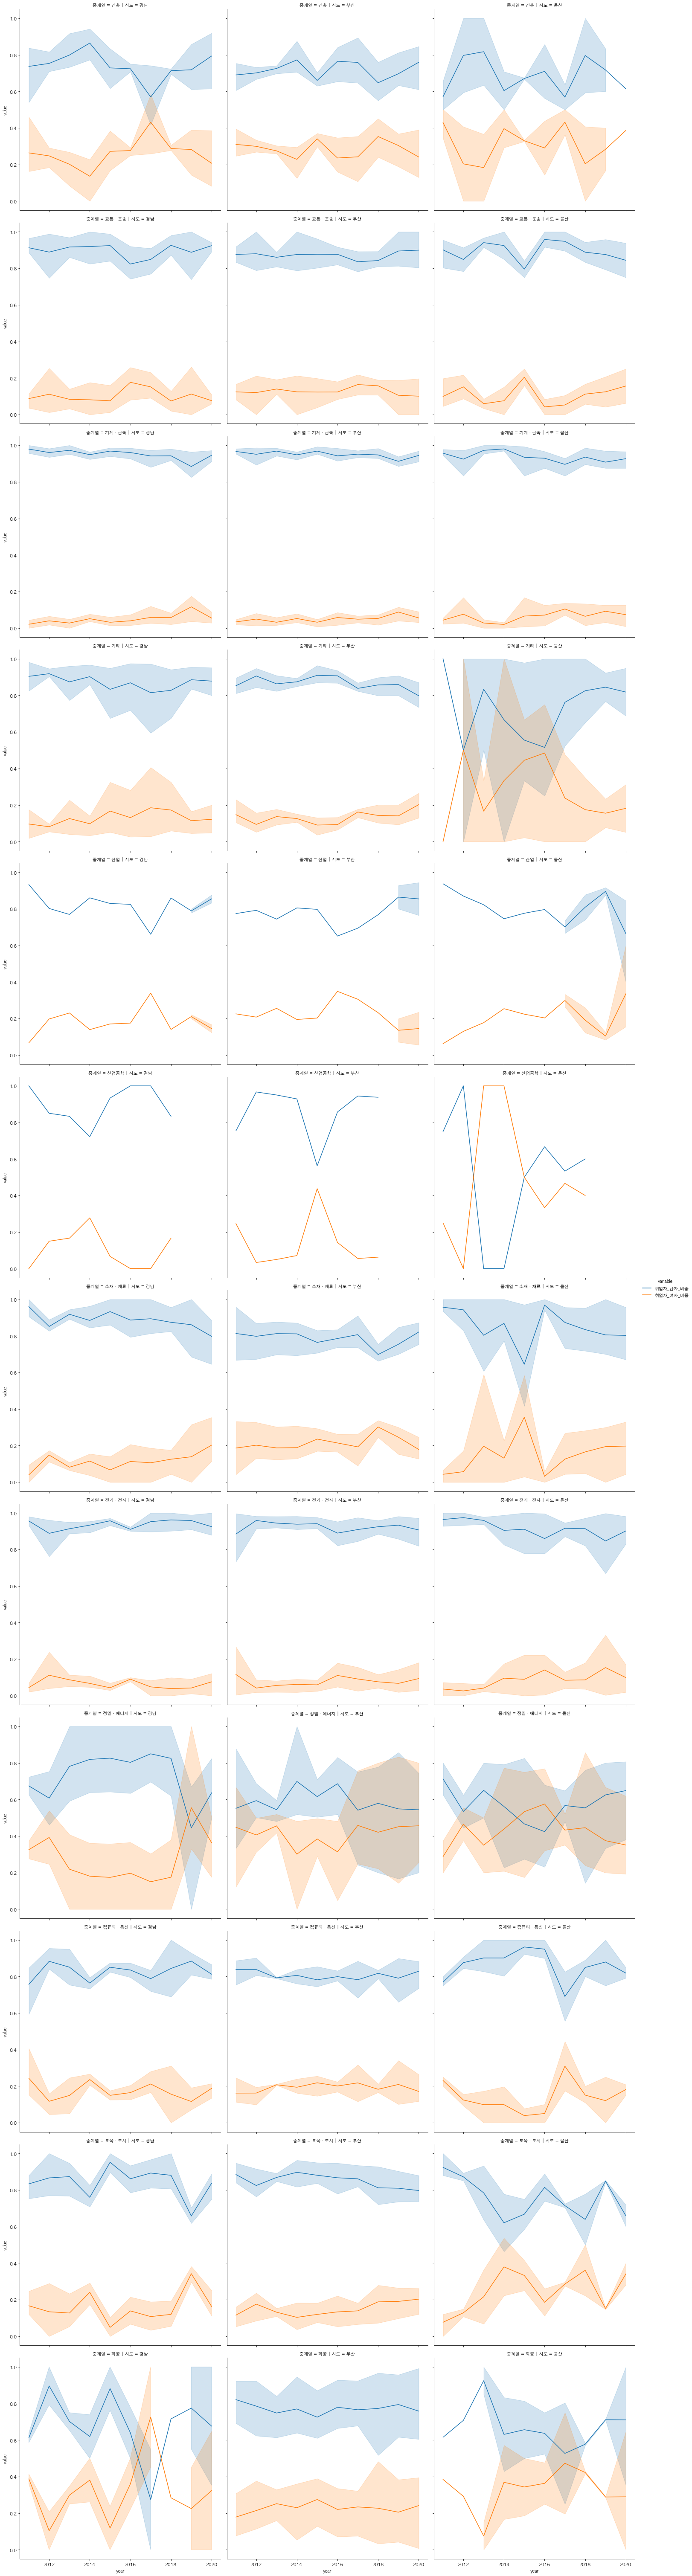

In [53]:
sns.relplot(data = sum222.query('variable in ["취업자_남자_비중", "취업자_여자_비중"] & 시도 in ["경남", "부산", "울산"]'), x = 'year', y = 'value', hue = 'variable', kind='line', height = 7,
col = '시도', row = '중계열')

In [56]:
sum1.to_excel('snt.xlsx', merge_cells = False)

In [55]:
sum1

졸업자_남자_비중  졸업자_여자_비중  취업자_남자_비중  취업자_여자_비중      전체_취업률  \
year 시도 대계열  과정구분                                                             
2011 경남 공학계열 대학과정     0.809518   0.190482   0.822435   0.177565   71.717778   
             대학원과정    0.875374   0.124626   0.911545   0.088455   82.843396   
             전문대학과정   0.868019   0.131981   0.856689   0.143311   75.758333   
        교육계열 대학과정     0.341768   0.658232   0.341334   0.658666   48.176923   
             대학원과정    0.403047   0.596953   0.427456   0.572544   87.369231   
...                        ...        ...        ...        ...         ...   
2020 울산 인문계열 대학원과정    0.250000   0.750000   0.500000   0.500000   50.000000   
             전문대학과정   1.000000   0.000000   1.000000   0.000000  100.000000   
        자연계열 대학과정     0.377080   0.622920   0.370096   0.629904   45.520000   
             대학원과정    0.594722   0.405278   0.645363   0.354637   77.660000   
             전문대학과정   0.481115   0.518885   0.466423   0.533577   78.400000   

                       남자_취업률    여자_취업률  
year 시도 대계열  과정구분                        
2011 경남 공학계열 대학과정    0.679504  0.646616  
             대학원과정   0.769008  0.521429  
             전문대학과정  0.701050  0.788800  
        교육계열 대학과정    0.446298  0.457513  
             대학원과정   0.944444  0.832222  
...                       ...       ...  
2020 울산 인문계열 대학원과정   1.000000  0.500000  
             전문대학과정  1.000000       NaN  
        자연계열 대학과정    0.375492  0.339998  
             대학원과정   0.686254  0.618750  
             전문대학과정  0.724270  0.697817  

[822 rows x 7 columns]